## Human Activity Recognition from (raw/unlabelled) wearables sensor data

Researchers have traditionally assessed physical activity and sleep by self-report but objective measurement tools have become increasingly common in the last decade.

Challenge: Nearly all accelerometer datasets have labelled time periods where an activity is performed. Given only a raw dataset with accelerometry data and heart rate - with no other information, is it possible to classify human activity?

project status: work in progress

In [70]:
import pandas as pd
import os
import glob
import csv
from datetime import datetime, timedelta
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import math
from matplotlib.pyplot import figure
import matplotlib.dates as mdates


### Raw data pre-processing

In [3]:
#Import the csv files

# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "Empatica/*.csv"))
  
  
# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f)
    df.columns = df.columns.str.replace(' ', '') # remove the empty space in each timestamp string

      
    # print the location and filename
#     print('Location:', f)
    print('File Name:', f.split("/")[-1])
      
    # print the content
    print('Content:')
    display(df)
    print()



File Name: ACC copy.csv
Content:


,1619855530.000000,1619855530.000000,1619855530.000000.1
0,32.0,32.0,32.0
1,6.0,-4.0,61.0
2,5.0,-3.0,61.0
3,7.0,-3.0,60.0
4,7.0,-3.0,61.0
...,...,...,...
2306,32.0,3.0,53.0
2307,32.0,5.0,54.0
2308,32.0,4.0,53.0
2309,32.0,5.0,53.0



File Name: ACC copy 8.csv
Content:


,1620413682.000000,1620413682.000000,1620413682.000000.1
0,32.0,32.0,32.0
1,-65.0,-7.0,2.0
2,-66.0,-7.0,2.0
3,-66.0,-7.0,2.0
4,-66.0,-8.0,2.0
...,...,...,...
2612720,17.0,31.0,61.0
2612721,12.0,30.0,54.0
2612722,42.0,38.0,22.0
2612723,11.0,30.0,65.0



File Name: HR copy 8.csv
Content:


,1620413692.000000
0,1.00
1,83.00
2,84.00
3,72.33
4,66.50
...,...
81629,88.53
81630,88.37
81631,88.20
81632,88.03



File Name: HR.csv
Content:


,1619855485.000000
0,1.00
1,62.00
2,62.00
3,61.33
4,60.50
5,60.40
6,60.50
7,60.71
8,61.00
9,61.22



File Name: HR copy.csv
Content:


,1619855540.000000
0,1.00
1,60.00
2,60.50
3,61.67
4,63.00
...,...
59,69.32
60,69.52
61,69.80
62,70.10



File Name: HR copy 2.csv
Content:


,1619855650.000000
0,1.00
1,60.00
2,62.50
3,78.00
4,79.25
...,...
79,91.97
80,90.83
81,89.68
82,88.48



File Name: HR copy 3.csv
Content:


,1619855790.000000
0,1.00
1,53.00
2,53.00
3,57.00
4,63.50
...,...
93876,78.97
93877,79.27
93878,79.53
93879,79.78



File Name: ACC.csv
Content:


,1619855475.000000,1619855475.000000,1619855475.000000.1
0,32.0,32.0,32.0
1,-20.0,8.0,59.0
2,-20.0,8.0,59.0
3,-20.0,7.0,59.0
4,-20.0,8.0,59.0
...,...,...,...
1208,-11.0,-3.0,61.0
1209,-12.0,-4.0,61.0
1210,-12.0,-4.0,61.0
1211,-12.0,-3.0,61.0



File Name: HR copy 7.csv
Content:


,1620252109.000000
0,1.00
1,94.00
2,71.00
3,65.00
4,73.75
...,...
139516,83.02
139517,83.13
139518,83.27
139519,83.35



File Name: HR copy 6.csv
Content:


,1620164680.000000
0,1.00
1,52.00
2,52.00
3,62.33
4,67.50
...,...
85233,78.07
85234,78.33
85235,78.53
85236,78.73



File Name: HR copy 4.csv
Content:


,1619952333.000000
0,1.00
1,78.00
2,69.50
3,73.67
4,76.00
...,...
83191,80.08
83192,80.30
83193,80.25
83194,80.13



File Name: HR copy 5.csv
Content:


,1620051458.000000
0,1.00
1,60.00
2,61.50
3,58.33
4,56.75
...,...
105972,110.53
105973,110.78
105974,111.05
105975,111.35



File Name: ACC copy 5.csv
Content:


,1620051448.000000,1620051448.000000,1620051448.000000.1
0,32.0,32.0,32.0
1,-34.0,39.0,-8.0
2,-42.0,36.0,0.0
3,-69.0,35.0,-1.0
4,-60.0,36.0,9.0
...,...,...,...
3391610,15.0,12.0,37.0
3391611,18.0,28.0,54.0
3391612,19.0,26.0,56.0
3391613,19.0,33.0,52.0



File Name: ACC copy 4.csv
Content:


,1619952323.000000,1619952323.000000,1619952323.000000.1
0,32.0,32.0,32.0
1,1.0,0.0,62.0
2,1.0,2.0,63.0
3,1.0,-1.0,61.0
4,-1.0,-1.0,62.0
...,...,...,...
2662670,40.0,27.0,60.0
2662671,38.0,19.0,40.0
2662672,35.0,19.0,46.0
2662673,42.0,16.0,49.0



File Name: ACC copy 6.csv
Content:


,1620164670.000000,1620164670.000000,1620164670.000000.1
0,32.0,32.0,32.0
1,59.0,-25.0,29.0
2,62.0,-28.0,32.0
3,56.0,-24.0,33.0
4,56.0,-17.0,30.0
...,...,...,...
2728004,-2.0,33.0,52.0
2728005,0.0,33.0,53.0
2728006,-2.0,38.0,52.0
2728007,1.0,32.0,52.0



File Name: ACC copy 7.csv
Content:


,1620252099.000000,1620252099.000000,1620252099.000000.1
0,32.0,32.0,32.0
1,25.0,41.0,33.0
2,26.0,41.0,33.0
3,28.0,46.0,32.0
4,30.0,48.0,32.0
...,...,...,...
4464938,26.0,27.0,86.0
4464939,14.0,31.0,66.0
4464940,13.0,28.0,59.0
4464941,15.0,20.0,30.0



File Name: ACC copy 3.csv
Content:


,1619855780.000000,1619855780.000000,1619855780.000000.1
0,32.0,32.0,32.0
1,25.0,-3.0,56.0
2,25.0,-3.0,56.0
3,24.0,-3.0,56.0
4,25.0,-3.0,56.0
...,...,...,...
3004520,36.0,31.0,44.0
3004521,35.0,32.0,48.0
3004522,24.0,11.0,47.0
3004523,36.0,-13.0,36.0



File Name: ACC copy 2.csv
Content:


,1619855640.000000,1619855640.000000,1619855640.000000.1
0,32.0,32.0,32.0
1,8.0,15.0,60.0
2,8.0,15.0,60.0
3,8.0,15.0,59.0
4,7.0,15.0,60.0
...,...,...,...
2948,47.0,10.0,38.0
2949,48.0,10.0,37.0
2950,50.0,10.0,39.0
2951,51.0,9.0,39.0


In [ ]:
## below code for Accelerometer data... 
with open('Empatica/ACC copy 3.csv', newline='') as f:
  
  reader = csv.reader(f)
  df = pd.read_csv(f)

for val in row1:
    newVal = val.replace(' ','')
    floatTime = int(float(newVal))
    dateElement = datetime.fromtimestamp(floatTime)
    columns.append(dateElement)


initTime = df.columns[0]
floatTime = int(float(initTime))
print(floatTime)
dateElement = datetime.fromtimestamp(floatTime)
print(dateElement)
df['datetime']=dateElement
pd.to_datetime(df['datetime'])
# df['datetime']


print(df.dtypes)

# df.head()



In [ ]:
## for HR data
with open('Empatica/HR copy 3.csv', newline='') as f:
  reader = csv.reader(f)
  row1 = next(reader)

print(row1)
print(len(row1))
columns = []
for val in row1:
    newVal = val.replace(' ','')
    floatTime = int(float(newVal))
    dateElement = datetime.fromtimestamp(floatTime)
    columns.append(dateElement)
    

print(columns, '< columns after forloop')
print(columns[0], '<columns[0]')

In [ ]:
### add timestamps feature for 24 hour timeblock
for i in range(len(df['datetime'])):
    if i < 92000:
        df['datetime'].loc[i] = df['datetime'].loc[i] + timedelta(seconds=i)

In [ ]:
# output to csv 

df.to_csv('HR copy 3_df.csv')
df.to_csv('ACC copy 3_df_output.csv')



In [11]:
ACC = pd.read_csv('./ACC copy 3_df_output.csv')
ACC = ACC.drop(columns='Unnamed: 0') # remove duplicated column


In [12]:
ACC.head(10)

,1619855780.000000,1619855780.000000,1619855780.000000.1,datetime
0,32.0,32.0,32.0,2021-05-01 08:56:20
1,25.0,-3.0,56.0,2021-05-01 08:56:21
2,25.0,-3.0,56.0,2021-05-01 08:56:22
3,24.0,-3.0,56.0,2021-05-01 08:56:23
4,25.0,-3.0,56.0,2021-05-01 08:56:24
5,25.0,-3.0,56.0,2021-05-01 08:56:25
6,25.0,-3.0,56.0,2021-05-01 08:56:26
7,25.0,-3.0,56.0,2021-05-01 08:56:27
8,25.0,-3.0,57.0,2021-05-01 08:56:28
9,25.0,-3.0,57.0,2021-05-01 08:56:29


In [5]:
ACC = ACC.iloc[11:]
ACC = ACC.reset_index(drop=True)

In [6]:
ACC.head()

,1619855780.000000,1619855780.000000,1619855780.000000.1,datetime
0,25.0,-3.0,56.0,2021-05-01 08:56:31
1,25.0,-3.0,56.0,2021-05-01 08:56:32
2,25.0,-3.0,57.0,2021-05-01 08:56:33
3,24.0,-3.0,57.0,2021-05-01 08:56:34
4,25.0,-3.0,57.0,2021-05-01 08:56:35


In [15]:
mapping_cols = {ACC.columns[0]: 'X_acc', ACC.columns[1]: 'Y_acc', ACC.columns[2]: 'Z_acc'}

ACC.rename(columns=mapping_cols, inplace=True)



In [16]:
ACC.head()

,X_acc,Y_acc,Z_acc,datetime
0,32.0,32.0,32.0,2021-05-01 08:56:20
1,25.0,-3.0,56.0,2021-05-01 08:56:21
2,25.0,-3.0,56.0,2021-05-01 08:56:22
3,24.0,-3.0,56.0,2021-05-01 08:56:23
4,25.0,-3.0,56.0,2021-05-01 08:56:24


In [17]:
ACC.tail()

,X_acc,Y_acc,Z_acc,datetime
86437,-10.0,49.0,37.0,2021-05-02 08:56:57
86438,-12.0,49.0,39.0,2021-05-02 08:56:58
86439,-15.0,48.0,35.0,2021-05-02 08:56:59
86440,-11.0,51.0,38.0,2021-05-02 08:57:00
86441,-15.0,52.0,37.0,2021-05-02 08:57:01


### Exploratory analysis & Transformation

In [19]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

def plot_axis(ax, x, y, title):
    ax.plot(x, y)
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
def plot_activity(activity):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
    plot_axis(ax0, activity['datetime'], activity['X_acc'], 'x Axis')
    plot_axis(ax1, activity['datetime'], activity['Y_acc'], 'y Axis')
    plot_axis(ax2, activity['datetime'], activity['Z_acc'], 'z Axis')
    plt.subplots_adjust(hspace=0.2)
    plt.ion()
    

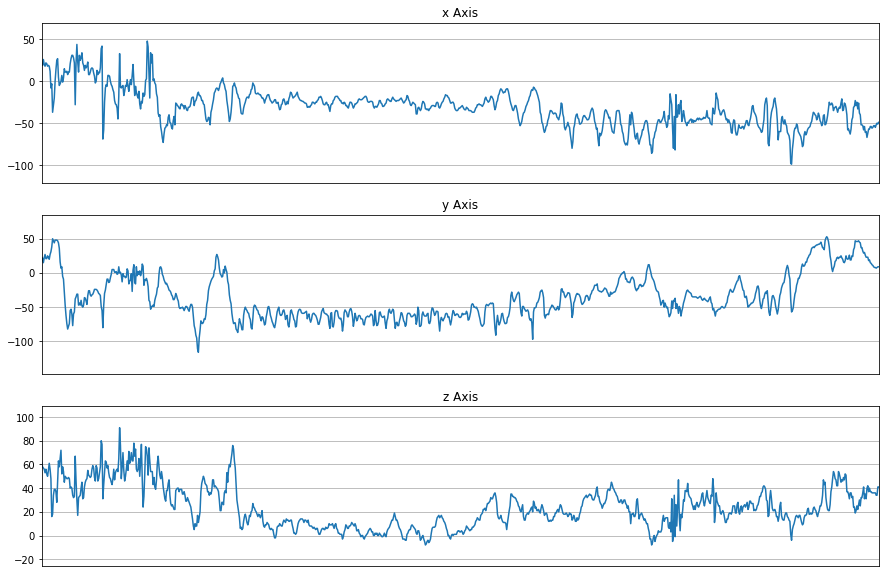

In [20]:
plot_activity(ACC[2000:3000])


### Converting wearable device units to Acceleration units (g) 

In [21]:

def transformG(num):
    return (num*2)/128
    


In [22]:
## Convert raw x,y,z values to g units based on Empatica formatting...
ACC['X_acc'] = ACC['X_acc'].apply(lambda x: transformG(x))
ACC['Y_acc'] = ACC['Y_acc'].apply(lambda x: transformG(x))
ACC['Z_acc'] = ACC['Z_acc'].apply(lambda x: transformG(x))

In [23]:
ACC.head()

,X_acc,Y_acc,Z_acc,datetime
0,0.500000,0.500000,0.500,2021-05-01 08:56:20
1,0.390625,-0.046875,0.875,2021-05-01 08:56:21
2,0.390625,-0.046875,0.875,2021-05-01 08:56:22
3,0.375000,-0.046875,0.875,2021-05-01 08:56:23
4,0.390625,-0.046875,0.875,2021-05-01 08:56:24


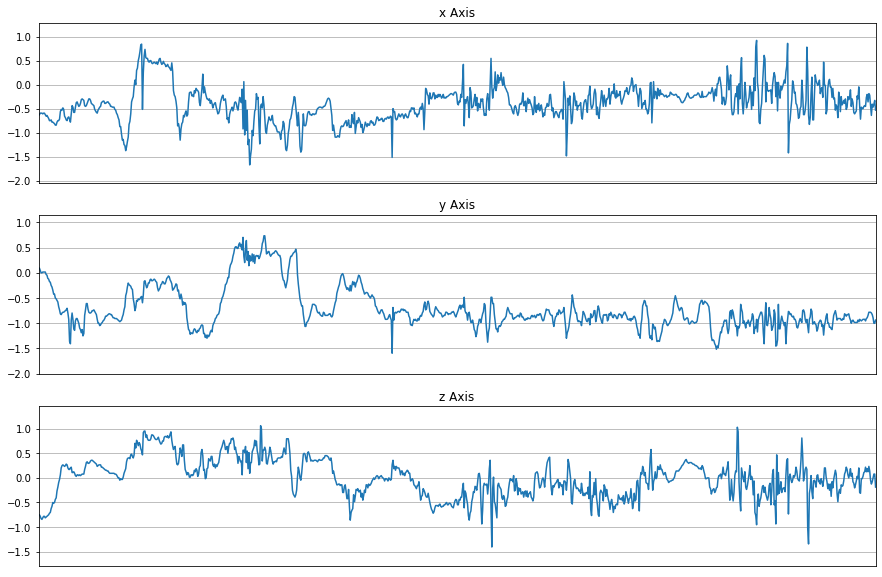

In [24]:
plot_activity(ACC[18000:19000])

### Combine x, y, z acceleration values into magnitude vector

In [25]:
#convert the three graphs into a single time-series block
import math

def magnitude(activity):
    x2 = activity['X_acc'] * activity['X_acc']
    y2 = activity['Y_acc'] * activity['Y_acc']
    z2 = activity['Z_acc'] * activity['Z_acc']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m


In [26]:
ACC['magnitude'] = magnitude(ACC)

In [27]:
ACC.head()

,X_acc,Y_acc,Z_acc,datetime,magnitude
0,0.500000,0.500000,0.500,2021-05-01 08:56:20,0.866025
1,0.390625,-0.046875,0.875,2021-05-01 08:56:21,0.959380
2,0.390625,-0.046875,0.875,2021-05-01 08:56:22,0.959380
3,0.375000,-0.046875,0.875,2021-05-01 08:56:23,0.953125
4,0.390625,-0.046875,0.875,2021-05-01 08:56:24,0.959380


In [28]:
HR = pd.read_csv('./HR copy 3_df.csv')
HR = HR.drop(columns='Unnamed: 0') # remove dummy column
HR.rename(columns={HR.columns[0]:'HR'}, inplace=True)



In [29]:
HR = HR.iloc[1:]
HR = HR.reset_index(drop=True)
HR.head()

,HR,datetime
0,53.0,2021-05-01 08:56:31
1,53.0,2021-05-01 08:56:32
2,57.0,2021-05-01 08:56:33
3,63.5,2021-05-01 08:56:34
4,61.2,2021-05-01 08:56:35


<AxesSubplot:>

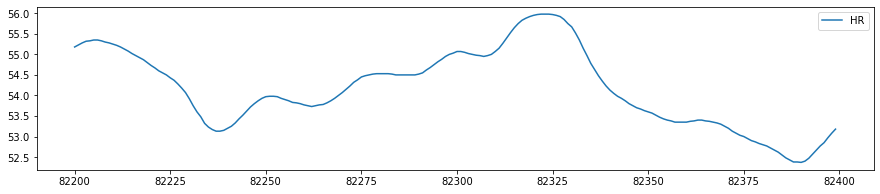

In [30]:
HR[82200:82400].plot(figsize=(15,3)) 

<AxesSubplot:>

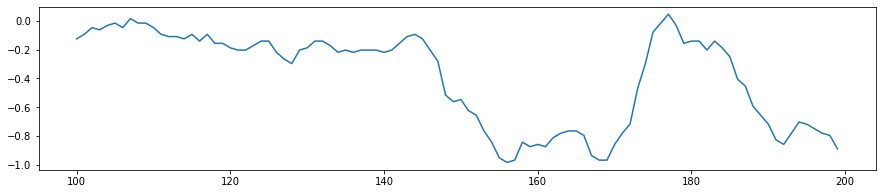

In [32]:
ACC[100:200]['Y_acc'].plot( figsize=(15,3))

In [33]:
ACC['datetime'] = pd.to_datetime(ACC.datetime)
HR['datetime'] = pd.to_datetime(HR.datetime)


In [34]:
ACC.set_index('datetime')

,X_acc,Y_acc,Z_acc,magnitude
datetime,,,,
2021-05-01 08:56:20,0.500000,0.500000,0.500000,0.866025
2021-05-01 08:56:21,0.390625,-0.046875,0.875000,0.959380
2021-05-01 08:56:22,0.390625,-0.046875,0.875000,0.959380
2021-05-01 08:56:23,0.375000,-0.046875,0.875000,0.953125
2021-05-01 08:56:24,0.390625,-0.046875,0.875000,0.959380
...,...,...,...,...
2021-05-02 08:56:57,-0.156250,0.765625,0.578125,0.972021
2021-05-02 08:56:58,-0.187500,0.765625,0.609375,0.996331
2021-05-02 08:56:59,-0.234375,0.750000,0.546875,0.957342


### Combining the datasets

In [35]:
HR.set_index('datetime')

,HR
datetime,
2021-05-01 08:56:31,53.00
2021-05-01 08:56:32,53.00
2021-05-01 08:56:33,57.00
2021-05-01 08:56:34,63.50
2021-05-01 08:56:35,61.20
...,...
2021-05-02 08:56:57,50.98
2021-05-02 08:56:58,50.95
2021-05-02 08:56:59,50.93


In [36]:
# merge columns based on datetime index
combined = pd.merge(left=ACC, right=HR, how='inner', on='datetime')

In [37]:
combined.head()
combined.tail()


,X_acc,Y_acc,Z_acc,datetime,magnitude,HR
86426,-0.156250,0.765625,0.578125,2021-05-02 08:56:57,0.972021,50.98
86427,-0.187500,0.765625,0.609375,2021-05-02 08:56:58,0.996331,50.95
86428,-0.234375,0.750000,0.546875,2021-05-02 08:56:59,0.957342,50.93
86429,-0.171875,0.796875,0.593750,2021-05-02 08:57:00,1.008509,50.95
86430,-0.234375,0.812500,0.578125,2021-05-02 08:57:01,1.024361,50.97


## Calculating major rest periods....

In order to calculate a 'major rest period', i.e. when activity is very minimal such as the case of sleep, we can use accelerometer data to calculate the arm angle at any given point in time. Here, the z-axis corresponds to the axis positioned perpendicular to the skin surface (dorsal-ventral direction when the wrist is in the anatomical position).

Estimated arm angles were averaged per 5 second epoch, and used to assess change in arm angle between successive 5 second epochs. Periods of time during which there was no change larger than 5° over at least 5 minutes were classified as bouts of sustained inactivity, or potential sleep periods. 


Reference: Van Hees et al. (2015) (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0142533)

The following formula can be used to estimate arm-angles using acceleration in three axes:


$ angle = \left( tan^{-1} \frac{a_{_{z}}}{\sqrt{a_{x}^2+a_{y}^2}{}} \right) *180/\pi $

In [38]:
combined["X_medRolling"] = combined['X_acc'].rolling(5).median()
combined["Y_medRolling"] = combined['Y_acc'].rolling(5).median()
combined["Z_medRolling"] = combined['Z_acc'].rolling(5).median()

In [39]:
## periods of rest were when no change in arm angle more than +/-5 degrees
combined["Z_angle"] = np.arctan( combined["Z_medRolling"] / ((combined["X_medRolling"] ** 2 + combined["Y_medRolling"] ** 2) ** 0.5)) * (180.0 / np.pi)  # get angle

In [40]:
## for 5 minutes if angle does not change more than 5 degrees, then sleeping
## calculate range for 5 minutes
fiveMins = 60 #5 second intervals
def angle_delta5(x):
#     print(x)
#     change = abs(np.max(x) - np.min(x))
    change = abs(x.iloc[-1] - x.iloc[0])
#     change = abs(change)
#     print(change)
    if change < 10:
        return 0 #inactive/asleep
    else:
        return 1 #awake
combined['activity'] = combined['Z_angle'].rolling(window=fiveMins).apply(angle_delta5)
# combined['angleMax'] = combined['Z_angle'].rolling(window=fiveMins).max()
# combined['angleMin'] = combined['Z_angle'].rolling(window=fiveMins).min()
# combined['angleRange'] = combined['angleMax'] - combined['angleMin'] 


In [41]:
# hours of activity vs inactivity based on arm angle (note: inactivity = sleep + wakeful inactivity )

# print(combined['activity'].value_counts())
hoursActiveInact = ((combined['activity'].value_counts())/60)/60
print('You spent a total of ') 
print(round(hoursActiveInact[1], 1)) # hoursActiveInact[0] is hours Inactive 
print('hours being active yesterday.')

print('\nAnd a total of ') 
print(round(hoursActiveInact[0], 1)) # hoursActiveInact[0] is hours Inactive 
print('hours inactive yesterday')

You spent a total of 
9.5
hours being active yesterday.

And a total of 
14.5
hours inactive yesterday


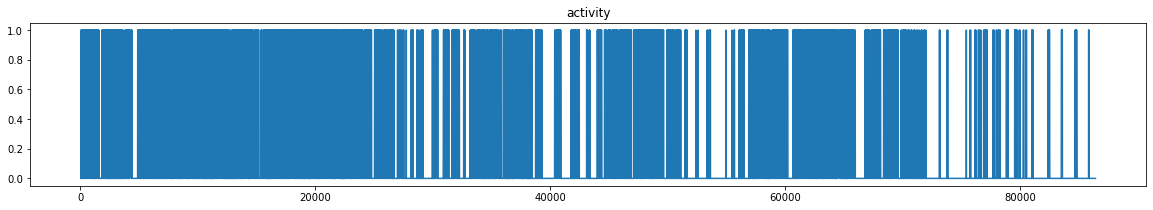

In [42]:
combined['activity'].plot(figsize=(20,3))
plt.title('activity')
myFmt = mdates.DateFormatter('%H:%M')
# ax.xaxis.set_major_formatter(myFmt)
# combined['angle'].plot( figsize=(20,3))


### Transforming Heart Rate data

Text(0.5, 1.0, 'Heart Rate')

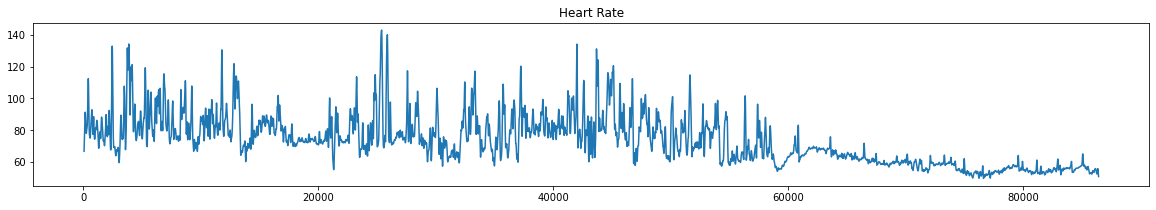

In [45]:
combined['HR'].rolling(60).mean().plot(figsize=(20,3))
plt.title('Heart Rate')

In [46]:
## plot heartrate during rest for two time periods 
combined_rest = combined[(combined['activity']==0)]

In [47]:
combined_rest['HR_restRolling'] = combined_rest['HR'].rolling(5).mean()
combined_rest.head()

/var/folders/sv/9lrjgq4x5sv93j6k_5fms4w00000gn/T/ipykernel_29623/545095744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_rest['HR_restRolling'] = combined_rest['HR'].rolling(5).mean()


,X_acc,Y_acc,Z_acc,datetime,magnitude,HR,X_medRolling,Y_medRolling,Z_medRolling,Z_angle,activity,HR_restRolling
63,0.343750,-0.359375,1.000000,2021-05-01 08:57:34,1.116832,70.87,0.390625,-0.203125,0.984375,65.902468,0.0,NaN
64,0.171875,-0.468750,0.937500,2021-05-01 08:57:35,1.062155,71.53,0.343750,-0.296875,0.984375,65.230887,0.0,NaN
65,-0.421875,-0.578125,0.781250,2021-05-01 08:57:36,1.059509,72.05,0.250000,-0.359375,0.937500,64.969110,0.0,NaN
66,-0.671875,-0.671875,0.796875,2021-05-01 08:57:37,1.240097,72.70,0.171875,-0.468750,0.890625,60.725858,0.0,NaN
85,0.218750,-0.250000,0.984375,2021-05-01 08:57:56,1.038916,81.90,-0.218750,-0.250000,0.953125,70.785054,0.0,73.81


In [48]:
# combined_rest_noNA = combined_rest['HR_restRolling'].dropna()
combined_rest['HR_restRolling'].mean()

71.4065687604481

In [49]:
# combined_rest_noNA.mean()

In [50]:
combined_rest.head()

,X_acc,Y_acc,Z_acc,datetime,magnitude,HR,X_medRolling,Y_medRolling,Z_medRolling,Z_angle,activity,HR_restRolling
63,0.343750,-0.359375,1.000000,2021-05-01 08:57:34,1.116832,70.87,0.390625,-0.203125,0.984375,65.902468,0.0,NaN
64,0.171875,-0.468750,0.937500,2021-05-01 08:57:35,1.062155,71.53,0.343750,-0.296875,0.984375,65.230887,0.0,NaN
65,-0.421875,-0.578125,0.781250,2021-05-01 08:57:36,1.059509,72.05,0.250000,-0.359375,0.937500,64.969110,0.0,NaN
66,-0.671875,-0.671875,0.796875,2021-05-01 08:57:37,1.240097,72.70,0.171875,-0.468750,0.890625,60.725858,0.0,NaN
85,0.218750,-0.250000,0.984375,2021-05-01 08:57:56,1.038916,81.90,-0.218750,-0.250000,0.953125,70.785054,0.0,73.81


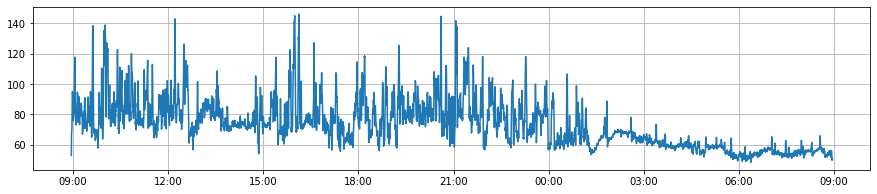

In [51]:
# plot the important features #
fig, ax = plt.subplots(figsize=(15,3))
plt.plot(combined['datetime'], combined['HR'])
xfmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
 
plt.grid()
plt.show()


In [52]:
combined['heart_pct'] = combined['HR'].pct_change().rolling(window=500).mean().values

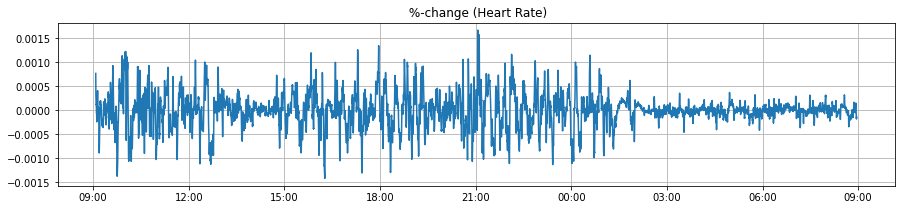

In [53]:
# plot the important features #
fig, ax = plt.subplots(figsize=(15,))
plt.plot(combined['datetime'], combined['heart_pct'])
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
plt.title(' %-change (Heart Rate)')
plt.grid()
plt.show()

In [54]:
combined['heart_ma'] = combined['HR'].rolling(window=400).mean().values

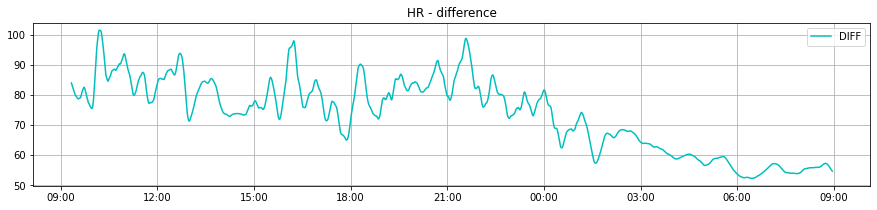

In [55]:
fig, ax = plt.subplots(figsize=(15, 3))
# plt.plot(combined['datetime'], combined['HR'], '-r', label='Heart Rate')
plt.plot(combined['datetime'], combined['heart_ma'].rolling(window=1000).mean().values, 'c', label='DIFF')
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
plt.title('HR - difference')
plt.legend()
plt.grid()

In [59]:
sleepRHR = int(combined['heart_ma'].iloc[67000:].mean()) 
print(sleepRHR)# sleeping heart rate


56


In [60]:

day_RHR1= combined['heart_ma'].iloc[37000:40380].mean() #confirmed 0 activity range 39000 :40380
day_RHR2 = combined['heart_ma'].iloc[27500:30000].mean()
day_RHRavg = int((day_RHR1 + day_RHR2)/2)
print(day_RHRavg)

80


In [61]:
print('Your daytime resting-heart-rate...')
print(day_RHRavg)

print('was much higher than your sleep resting-heart-rate..')
print(sleepRHR)

print('This could indicate high levels of stress today')
      
#       + ') is much higher than your sleep resting-heart-rate (' + sleepRHR + '). This could indicate high levels of stress today')

Your daytime resting-heart-rate...
80
was much higher than your sleep resting-heart-rate..
56
This could indicate high levels of stress today


In [68]:
combined_wake = combined.iloc[0:84000]

<AxesSubplot:>

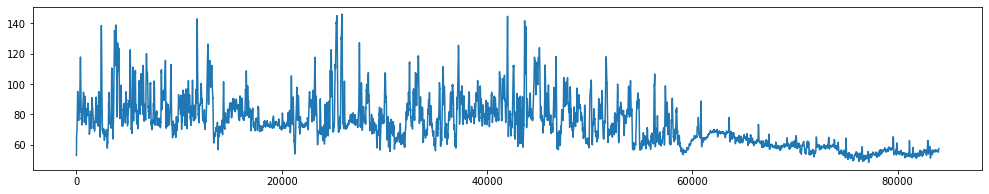

In [68]:
combined_wake['HR'].plot(figsize=(17,3))

In [59]:
combined1 = combined.iloc[81000:82600]

In [60]:
combined1 = combined1.reset_index(drop=True)

In [61]:
combined1.head()

,X_acc,Y_acc,Z_acc,datetime,magnitude,HR,X_medRolling,Y_medRolling,Z_medRolling,Z_angle,activity,heart_pct,heart_ma
0,-0.156250,0.734375,0.625000,2021-05-02 07:26:31,0.976906,52.88,-0.125000,0.703125,0.671875,43.252982,0.0,-0.000058,53.162150
1,-0.140625,0.718750,0.656250,2021-05-02 07:26:32,0.983382,52.95,-0.140625,0.718750,0.671875,42.532922,0.0,-0.000057,53.158100
2,-0.140625,0.687500,0.640625,2021-05-02 07:26:33,0.950175,53.02,-0.140625,0.718750,0.656250,41.862061,0.0,-0.000056,53.154325
3,-0.125000,0.625000,0.640625,2021-05-02 07:26:34,0.903687,53.07,-0.140625,0.718750,0.640625,41.176823,0.0,-0.000056,53.150800
4,-0.109375,0.703125,0.718750,2021-05-02 07:26:35,1.011410,53.12,-0.140625,0.703125,0.640625,41.778174,0.0,-0.000056,53.147525


In [62]:
combined2=combined.iloc[0:85000]


In [63]:
combined2 = combined2.reset_index(drop=True)

In [64]:
combined2.head()

,X_acc,Y_acc,Z_acc,datetime,magnitude,HR,X_medRolling,Y_medRolling,Z_medRolling,Z_angle,activity,heart_pct,heart_ma
0,0.390625,-0.046875,0.875000,2021-05-01 08:56:31,0.959380,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.390625,-0.046875,0.875000,2021-05-01 08:56:32,0.959380,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.390625,-0.046875,0.890625,2021-05-01 08:56:33,0.973652,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375000,-0.046875,0.890625,2021-05-01 08:56:34,0.967489,63.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.390625,-0.046875,0.890625,2021-05-01 08:56:35,0.973652,61.2,0.390625,-0.046875,0.890625,66.166886,NaN,NaN,NaN


In [65]:
def plot_rolling_corr(corr_s: pd.Series, ax=None):
    """
    Plot a rolling correlation.

    Parameters:
    corr_s: the rolling correlation.
    ax: axes.
    """
    fig, ax = plt.subplots(figsize=(15,3))
    ax.set_yticks([]);
    return fig, ax

In [66]:
rolling_corr = combined['magnitude'].rolling(20).corr(combined1['HR'])


In [77]:
combined['HR_movAvg'] = combined['HR'].rolling(600).mean()
combined['magnitude_movAvg'] = combined['magnitude'].rolling(30).mean()

<AxesSubplot:xlabel='datetime'>

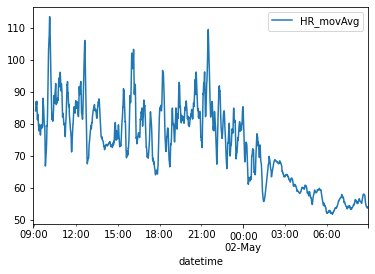

In [78]:
combined.plot.line(x='datetime', y='HR_movAvg')

### Splitting data into discrete time-windows

Splitting the data into windows and performing calculations on each time-window

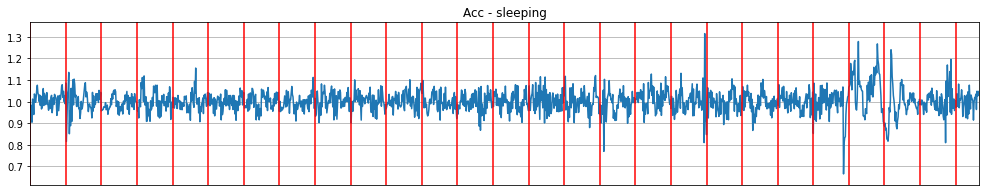

In [81]:
## create the window for sleeping
def windows(df, size=120):
    start = 0
    while start < df.count():
        yield start, start + size
        start += int((size / 2))

fig, ax = plt.subplots(nrows=1, figsize=(17, 3))
plot_axis(ax, combined1['datetime'], combined1['magnitude'], 'Acc')

for (start, end) in windows(combined1['datetime']):
    ax.axvline(combined1['datetime'][start], color='r')
    
plt.show()

Statistical features within each time window can help classify the activity. Mean amplitude deviation has been found to be a good predictor of raw unlabelled data

In [56]:
from scipy.stats import skew, kurtosis
from statsmodels.tsa import stattools
import numpy as np
import math

def jitter(axis, start, end):
    j = 0
    for i in range(start, min(end, axis.count())):
        if start != 0:
            j += abs(axis[i] - axis[i-1])
    return j / (end-start)

def mean_crossing_rate(axis, start, end):
    cr = 0
    m = axis.mean()
    for i in range(start, min(end, axis.count())):
        if start != 0:
            p = axis[i-1] > m
            c = axis[i] > m
            if p != c:
                cr += 1
    return float(cr) / (end-start-1)

def mean_Amp_Dev(axis, start, end):
    n_recip = 1/(axis.count())
    r_i = axis[end]
    r_mean = axis[start:end].mean()
    meanAD = n_recip * abs(r_i - r_mean)
    
    return meanAD

def window_summary(axis, start, end):
    acf = stattools.acf(axis[start:end])
    acv = stattools.acovf(axis[start:end])
    sqd_error = (axis[start:end] - axis[start:end].mean()) ** 2
    return [
        
        jitter(axis, start, end),     
        mean_crossing_rate(axis, start, end),
        axis[start:end].mean(),
        axis[start:end].std(),
        axis[start:end].var(),
        axis[start:end].min(),
        axis[start:end].max(),
        acf.mean(), # mean auto correlation
        acf.std(), # standard deviation auto correlation
        acv.mean(), # mean auto covariance
        acv.std(), # standard deviation auto covariance
        skew(axis[start:end]),
        kurtosis(axis[start:end]),
        math.sqrt(sqd_error.mean())
    ]

def features(activity):
    for (start, end) in windows(activity['datetime']):
        features = []
        for axis in ['X_acc', 'Y_acc', 'Z_acc', 'magnitude']:
            features += window_summary(activity[axis], start, end)
        yield features